# Troll tweets

In [130]:
import pathlib
import sklearn
import numpy
import nltk
import pandas as pd
import glob
import os
import advertools as adv
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import matplotlib.style as style

sns.set_palette("muted", 10)
style.use('seaborn-whitegrid')
sns.set()

In [131]:
import pickle
import pandas as pd

# load the pickled dataframe
english_only = pickle.load(open("english_only_df.pickle", "rb"))
# time indexed version
english_only_dti = english_only.set_index(['publish_date'])

In [132]:
# indexing by datetime
rt_elect_day = english_only_dti['2016-11-7':'2016-11-9'].query("account_category == 'RightTroll'")
rt_elect_day['2016-11-08 18:00':'2016-11-09'].head()

,external_author_id,author,content,region,language,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category,tid,sentiment
publish_date,,,,,,,,,,,,,,,,
2016-11-08 18:03:00,1.660771e+09,GARRETTSIMPSON_,I LOVE IT!!! Put ur electrified #TrumpPence16...,United States,English,11/8/2016 18:03,1339,1586,2269,NaN,Right,0,0,RightTroll,6171,0.7788
2016-11-08 18:15:00,1.660771e+09,GARRETTSIMPSON_,#ElectionFinalThoughts #maga #crookedhillary #...,United States,English,11/8/2016 18:16,1339,1587,2273,NaN,Right,0,0,RightTroll,6174,0.0000
2016-11-08 18:39:00,1.660771e+09,GARRETTSIMPSON_,'@HillaryClinton @POTUS Yes! #TrumpWinsBecause...,United States,English,11/8/2016 18:39,1339,1587,2274,NaN,Right,0,0,RightTroll,6175,0.6902
2016-11-08 18:52:00,1.660771e+09,GARRETTSIMPSON_,Pretty excited to vote for my first presidenti...,United States,English,11/8/2016 18:52,1339,1587,2275,NaN,Right,0,0,RightTroll,6176,0.7339
2016-11-08 19:05:00,1.660771e+09,GARRETTSIMPSON_,#VoteGreen #NeverHillary #DemExit #JillNotHill...,United States,English,11/8/2016 19:06,1339,1587,2277,NaN,Right,0,0,RightTroll,6177,0.0000


In [133]:
lt_elect_day = english_only_dti['2016-11-7':'2016-11-9'].query("account_category == 'LeftTroll'")
lt_elect_day['2016-11-08 18:00':'2016-11-09'].head()

,external_author_id,author,content,region,language,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category,tid,sentiment
publish_date,,,,,,,,,,,,,,,,
2016-11-09 16:22:00,1.672193e+09,JONATHANDOTNET,'@AdrianChen Trump is Putin's agent',United States,English,11/9/2016 16:22,26,105,4,NaN,left,1,0,LeftTroll,326395,0.0000
2016-11-09 16:31:00,1.672193e+09,JONATHANDOTNET,'@AdrianChen much of the political content Ame...,United States,English,11/9/2016 16:32,26,105,5,NaN,left,1,0,LeftTroll,326396,0.0000
2016-11-08 21:11:00,7.910000e+17,JUSTICE4TAMIR_,'@newvoicescle We will never forget Tamir Rice...,Unknown,English,11/8/2016 21:11,1943,294,3,NaN,left,0,0,LeftTroll,338079,0.7876
2016-11-08 21:12:00,7.910000e+17,JUSTICE4TAMIR_,'@blckcleveland We will never forget Tamir Ric...,Unknown,English,11/8/2016 21:12,1948,294,5,NaN,left,0,0,LeftTroll,338080,0.7876
2016-11-08 21:12:00,7.910000e+17,JUSTICE4TAMIR_,'@GCLEABJ We will never forget Tamir Rice! Ple...,Unknown,English,11/8/2016 21:12,1946,294,4,NaN,left,0,0,LeftTroll,338081,0.7876


In [134]:
right_trolls = english_only.query("account_category == 'RightTroll'")
left_trolls = english_only.query("account_category == 'LeftTroll'")

In [135]:
r_hashtag_summary = pickle.load(open("r_hashtag_summary.pickle", "rb"))
l_hashtag_summary = pickle.load(open("l_hashtag_summary.pickle", "rb"))

In [136]:
print(r_hashtag_summary['overview'])
print(l_hashtag_summary['overview'])

{'num_posts': 406192, 'num_hashtags': 285550, 'hashtags_per_post': 0.7029926734155276, 'unique_hashtags': 16532}
{'num_posts': 76407, 'num_hashtags': 69726, 'hashtags_per_post': 0.912560367505595, 'unique_hashtags': 8345}


In [137]:
r_hashtag_summary['hashtag_freq'][:15]

[(0, 248253),
 (1, 75984),
 (2, 60117),
 (3, 11659),
 (4, 4526),
 (5, 2293),
 (6, 1202),
 (7, 722),
 (8, 890),
 (9, 264),
 (10, 153),
 (11, 86),
 (12, 31),
 (13, 3),
 (14, 7)]

In [138]:
l_hashtag_summary['hashtag_freq'][:15]

[(0, 38847),
 (1, 20913),
 (2, 9316),
 (3, 3654),
 (4, 1624),
 (5, 906),
 (6, 520),
 (7, 252),
 (8, 201),
 (9, 91),
 (10, 56),
 (11, 16),
 (12, 7),
 (13, 1),
 (15, 1)]

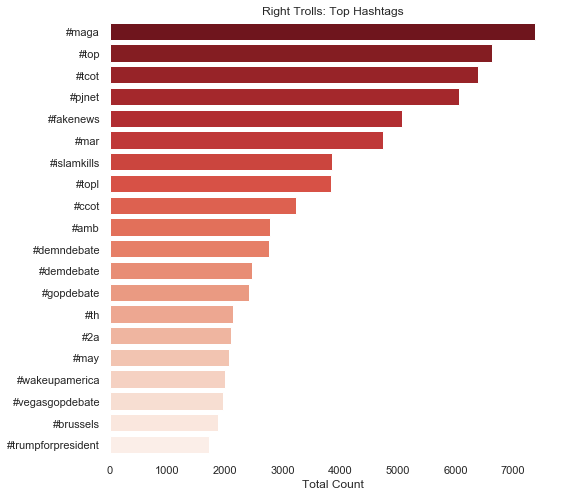

In [139]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(
    [x[1] for x in r_hashtag_summary['top_hashtags'][:][:20]],
    [x[0] for x in r_hashtag_summary['top_hashtags'][:][:20]],
    palette="Reds_r")
ax.set_xlabel('Total Count')
plt.title('Right Trolls: Top Hashtags')
plt.gca().set_frame_on(False)

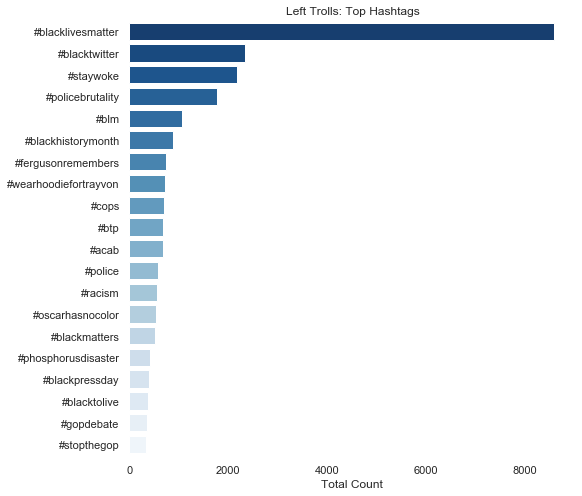

In [140]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(
    [x[1] for x in l_hashtag_summary['top_hashtags'][:][:20]],
    [x[0] for x in l_hashtag_summary['top_hashtags'][:][:20]],
    palette="Blues_r")
ax.set_xlabel('Total Count')
plt.title('Left Trolls: Top Hashtags')
plt.gca().set_frame_on(False)

In [141]:
r_emoji_summary = pickle.load(open("r_emoji_summary.pickle", "rb"))
l_emoji_summary = pickle.load(open("l_emoji_summary.pickle", "rb"))

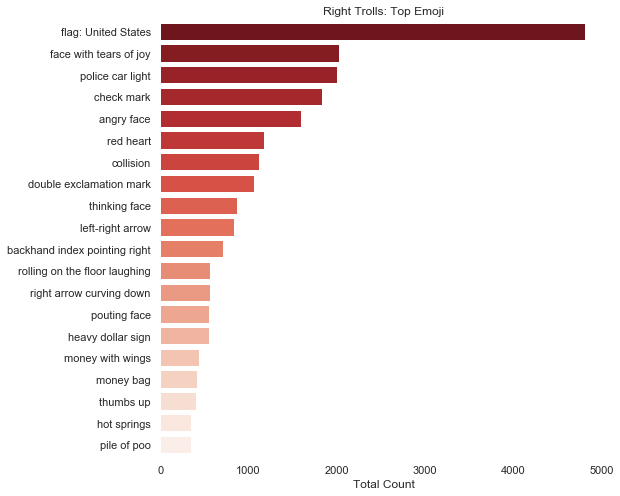

In [142]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(
    [x[1] for x in r_emoji_summary['top_emoji_text'][:20]],
    [x[0] for x in r_emoji_summary['top_emoji_text'][:20]],
    palette='Reds_r')
ax.set_xlabel('Total Count')
plt.title('Right Trolls: Top Emoji')
plt.gca().set_frame_on(False)

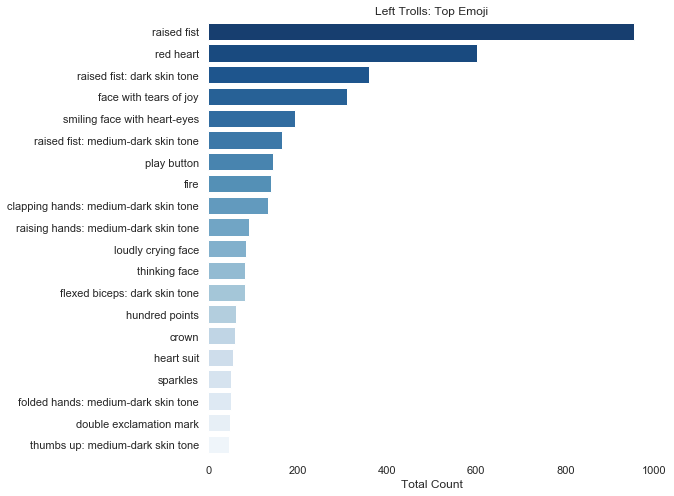

In [143]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(
    [x[1] for x in l_emoji_summary['top_emoji_text'][:20]],
    [x[0] for x in l_emoji_summary['top_emoji_text'][:20]],
    palette='Blues_r')
ax.set_xlabel('Total Count')
plt.title('Left Trolls: Top Emoji')
plt.gca().set_frame_on(False)

In [144]:
r_mention_summary = pickle.load(open("r_mention_summary.pickle", "rb"))
l_mention_summary = pickle.load(open("l_mention_summary.pickle", "rb"))

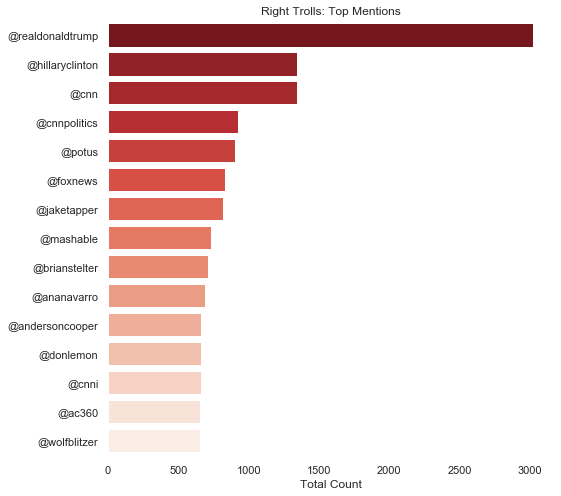

In [145]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(
    [x[1] for x in r_mention_summary['top_mentions'][:15]],
    [x[0] for x in r_mention_summary['top_mentions'][:15]],
    palette='Reds_r')
ax.set_xlabel('Total Count')
plt.title('Right Trolls: Top Mentions')
plt.gca().set_frame_on(False)

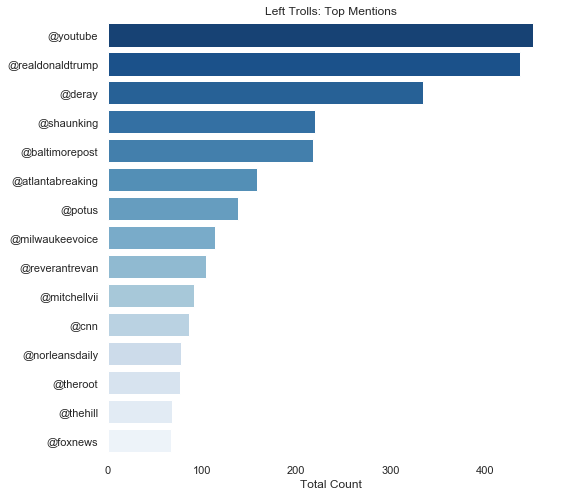

In [146]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(
    [x[1] for x in l_mention_summary['top_mentions'][:15]],
    [x[0] for x in l_mention_summary['top_mentions'][:15]],
    palette='Blues_r')
ax.set_xlabel('Total Count')
plt.title('Left Trolls: Top Mentions')
plt.gca().set_frame_on(False)

In [147]:
r_question_summary = pickle.load(open("r_question_summary.pickle", "rb"))
[(i,x) for i, x in  enumerate(r_question_summary['question_text']) if x][:15]

[(48, ["Did you ever wonder what's the worst breakup text ever typed?"]),
 (67, ['Why compare yourself with others?']),
 (91, ['Mad Much?']),
 (98, ["Well, that's your opinion, isn't it?"]),
 (108, ['How Can You Still Call That A Skirt??']),
 (110, ['WHAT THE????']),
 (133, ['Have u ever wanted to kiss someone really bad?']),
 (192, ['Blame BILL DEBLASIO, worst man ever, maybe now he will be fired?']),
 (197, ['Can we learn, this time?', 'Or do we need another lesson?']),
 (209, ['Drugs are illegal, so what?']),
 (213, ["What about Obama's and Saudi's friendship?"]),
 (224,
  ['#ILoveObama Obama is ready to give money to other countries and what about his own?']),
 (248, ['The #conservative #Paglia?']),
 (257, ['Until they started to do it first?']),
 (258, ['#ObamaLovesAmerica Can you imagine ISIS tweets??'])]

In [148]:
l_question_summary = pickle.load(open("l_question_summary.pickle", "rb"))
[(i,x) for i, x in  enumerate(l_question_summary['question_text']) if x][:15]

[(35, ['#WHOISMUHAMMAD ?']),
 (91, ["'@BaltimorePost Is this legal?"]),
 (93, ['What if we burn Chicago Police Departament down?']),
 (115, ['Why do black women hate theirself?']),
 (122, ['What are U passing to your children?']),
 (136,
  ["how long you think it'll be till we can get the image of Africa on #OscarsSoWhite ?"]),
 (139, ['ISIS is Obama`s project don`t you get it??']),
 (246, ['how to be smart but not boring?']),
 (270, ['What`s my bf`s password??']),
 (283, ['Advice?']),
 (295, ['very touching song??']),
 (308,
  ['What about celebrating the 51 anniversary of MLK #SelmaToMontgomery1965 with another march for our rights?']),
 (310, ['Why they want to kill us all?']),
 (311, ['ISIS in Texas??', 'What should we do?']),
 (312, ['WTF??'])]

### NER

> how we cleaned the data up, here if you need to run it

```python
import nltk 
import spacy
from tqdm.autonotebook import tqdm
tqdm._instances.clear()

model="en_core_web_sm"

nlp = spacy.load(model)

def do_ner(dfs, df_names):
    df_entity_dfs = {}
    
    for df, df_name in zip(dfs, df_names):
        entity_list = []
        
        for _, row in tqdm(df.iterrows(), desc=df_name, total=int(df.tid.count())):        
            doc = nlp(row.content)
        
            for ent in doc.ents:
                entity_list.append((ent.text.lower(), ent.label_, row.tid))
        
        entities_df = pd.DataFrame(data=entity_list , columns = ['Entity', 'Type', 'tid'])
        df_entity_dfs[df_name] = entities_df
    
    return df_entity_dfs

named_entities = do_ner([right_trolls, left_trolls], ['right_trolls', 'left_trolls'])

# canonicalize relevant entities
replacements = [('donald trump', 'trump'),('hillary clinton', 'hillary'),('clinton', 'hillary'),('bernie sanders', 'sanders'),
                ('bernie', 'sanders'),('barack obama', 'obama'),('barack', 'obama'),('u.s.', 'usa'),
                ('us', 'usa'),('america', 'usa'),('dems', 'democrats'),('the white house', 'white house')]

for key, value in named_entities.items():
    for rfrom, rto in replacements:
        value = value.replace(rfrom, rto, regex=False)
    # remove irrelevant NE types
    value = value.query(
        "not Type in ['MONEY', 'DATE', 'ORDINAL', 'CARDINAL', 'TIME', 'PERCENT', 'QUANTITY']")
    # keep only NEs containing alphabetic chars
    value = value[value.Entity.str.isalpha()]
    named_entities[key] = value
```

In [149]:
named_entities = pickle.load(open('named_entities.pickle', 'rb'))

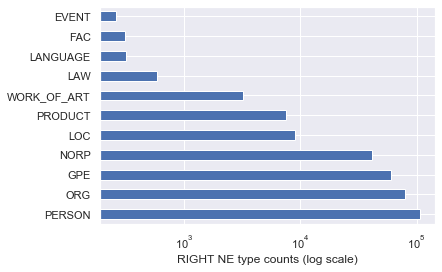

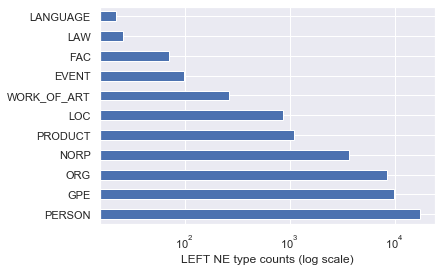

In [150]:
# quick plot of NE types
ax = named_entities['right_trolls'].Type.value_counts().plot.barh()
ax.set_xscale('log')
ax.set_xlabel('RIGHT NE type counts (log scale)')
plt.show()
ax = named_entities['left_trolls'].Type.value_counts().plot.barh()
ax.set_xscale('log')
ax.set_xlabel('LEFT NE type counts (log scale)')
plt.show()

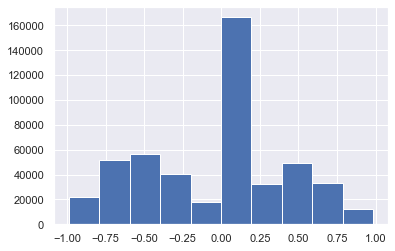

In [151]:
english_only.sentiment.hist()

> again, for reference

```py
ne_sents = []
df = english_only

def calc_ne_sentiment(x):
    tids = list(set(x.tid))
    mean_sent = df[df.tid.isin(tids)].sentiment.mean()
    ne_sents.append([x.Entity.values[0], x.Type.values[0],
                     df[df.tid.isin(tids)].sentiment.mean(), tids, len(tids)])

named_entities['left_trolls'].groupby('Entity').apply(calc_ne_sentiment)

ne_sentiments = pd.DataFrame(ne_sents, columns=['Entity', 'Type', 'sentiment', 'tids', 'freq'])
```

In [152]:
NR_TOP_NES = 30
l_ne_sentiments = pickle.load(open("l_ne_sentiments.pickle", "rb")).head(NR_TOP_NES)
l_ne_sentiments

,Entity,Type,sentiment,tids,freq
5947,trump,PERSON,-0.049493,"[1859585, 2547716, 2548171, 2547719, 40968, 40...",2215
6095,usa,GPE,-0.097494,"[679942, 40967, 1720338, 2539538, 2777108, 253...",1691
694,blacktwitter,PERSON,-0.018970,"[2760709, 79878, 2760711, 2529295, 2529296, 29...",922
1104,chicago,GPE,-0.156227,"[40970, 2240527, 1718288, 147480, 2936856, 253...",568
172,american,NORP,-0.086991,"[1026049, 348163, 2543620, 2871300, 2543622, 7...",562
1956,fergusonremembers,PERSON,-0.206762,"[2777106, 2777107, 133159, 133160, 133161, 133...",427
4336,obama,LOC,0.000781,"[1970190, 272402, 2543636, 2527262, 348199, 25...",371
2269,gop,ORG,-0.094183,"[2871300, 2871304, 2871306, 2562060, 780301, 2...",326
183,americans,NORP,-0.182463,"[272384, 2527234, 347652, 2535433, 2937353, 69...",298
413,baltimore,GPE,-0.087717,"[2184193, 698373, 1716230, 1717769, 1451532, 1...",282


In [153]:
r_ne_sentiments = pickle.load(open("r_ne_sentiments.pickle", "rb")).head(NR_TOP_NES)
r_ne_sentiments

,Entity,Type,sentiment,tids,freq
14323,trump,PERSON,-0.060513,"[1310750, 2883616, 2621485, 2621486, 2883630, ...",23897
14760,usa,GPE,-0.039606,"[2031633, 2261013, 294938, 2261022, 1310751, 6...",10195
6205,hillary,PERSON,-0.075333,"[2752512, 2031617, 2195459, 1310725, 2031631, ...",9337
10254,obama,ORG,-0.088691,"[229379, 1867780, 2261000, 1310731, 1933364, 2...",8125
3706,democrats,NORP,-0.191302,"[2261002, 1310731, 557072, 1310744, 1867809, 2...",5920
2891,cnn,ORG,-0.159142,"[2195457, 2424834, 2883603, 2195496, 229418, 2...",5501
5613,gop,ORG,-0.059426,"[1523720, 434185, 1990670, 57359, 1867793, 573...",4279
470,americans,NORP,-0.094771,"[2310144, 24579, 1310726, 1548297, 2465801, 15...",3576
9945,nfl,ORG,-0.133398,"[1466374, 1466375, 1482758, 1466379, 1531916, ...",3461
455,american,NORP,0.024684,"[2752513, 1482755, 1548295, 1867785, 1982473, ...",3365


Text(0.5, 1.0, 'Right: Normalized Sentiment of Top Named Entities')

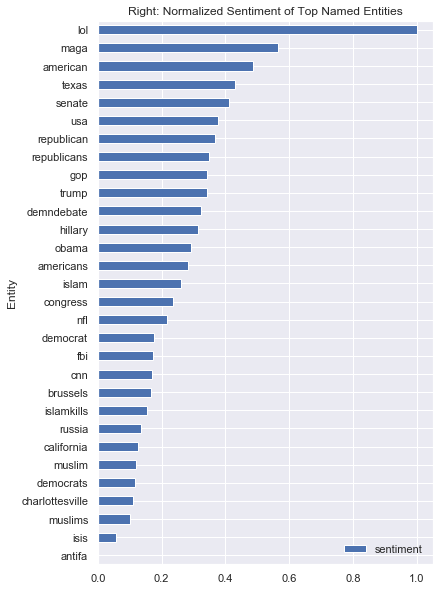

In [154]:
df = r_ne_sentiments
x = df.sentiment.values
x = (x-np.max(x))
x_scaled =(x-np.min(x))/(np.max(x)-np.min(x))
df.sentiment = x_scaled
ax = df.sort_values(by='sentiment').plot.barh(y='sentiment', x='Entity')
ax.figure.set_size_inches(6,10)
ax.set_title('Right: Normalized Sentiment of Top Named Entities')

Text(0.5, 1.0, 'Left: Normalized Sentiment of Top Named Entities')

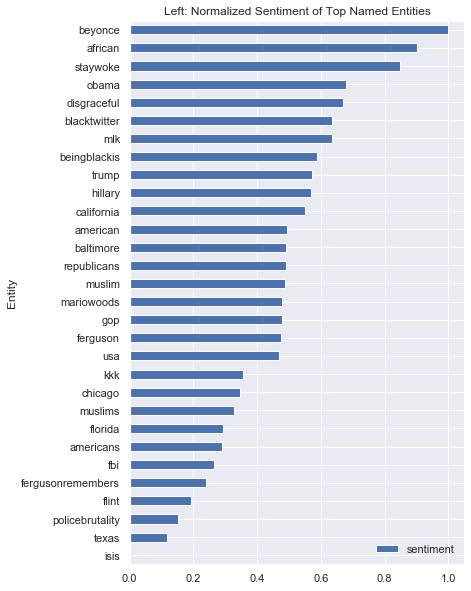

In [155]:
df = l_ne_sentiments
x = df.sentiment.values
x = (x-np.max(x))
x_scaled =(x-np.min(x))/(np.max(x)-np.min(x))
df.sentiment = x_scaled
ax = df.sort_values(by='sentiment').plot.barh(y='sentiment', x='Entity')
ax.figure.set_size_inches(6,10)
ax.set_title('Left: Normalized Sentiment of Top Named Entities')